<a href="https://colab.research.google.com/github/ssreeramj/langgraph-tutorials/blob/main/LangGraph_Tutorials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Copyright © 2023 Patrick Loeber

# LangChain

LangChain is a framework for developing applications powered by language models.

- GitHub: https://github.com/hwchase17/langchain
- Docs: https://python.langchain.com/en/latest/index.html

### Overview:
- Installation
- LLMs
- Prompt Templates
- Chains
- Agents and Tools
- Memory
- Document Loaders
- Indexes

## Installation

In [ ]:
!pip install -qU langchain langgraph openai langchain-groq langchain-openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 975.5/975.5 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.9/88.9 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.5/327.5 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.8/332.8 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.4/127.4 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 13.8 MB/s eta 0:00:00


## LangGraph Tutorial

In [ ]:
from langchain_core.messages import HumanMessage
from langgraph.graph import END, MessageGraph

import os
from google.colab import userdata

from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeColors

In [ ]:
def display_graph(g):
    display(
        Image(
            g.get_graph().draw_mermaid_png(
                draw_method=MermaidDrawMethod.API,
            )
        )
    )

In [ ]:
def add_one(input):
    print(f"{input=}")
    input[0].content = input[0].content + 'a'
    return input

In [ ]:
graph = MessageGraph()

graph.add_node("node_a", add_one)
graph.add_edge("node_a", "node_b")
graph.add_edge("node_a", "node_c")

graph.add_node("node_b", add_one)
graph.add_node("node_c", add_one)

graph.add_edge("node_b", END)
graph.add_edge("node_c", END)

graph.set_entry_point("node_a")

runnable = graph.compile()

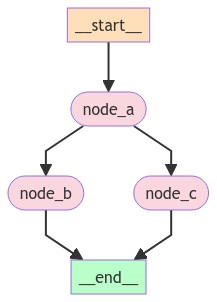

In [ ]:
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeColors

display(
    Image(
        runnable.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [ ]:
result = runnable.invoke("b")
result[0].content

input=[HumanMessage(content='b', id='81a42657-cc72-4d47-bdd2-a51da7978cd9')]
input=[HumanMessage(content='ba', id='81a42657-cc72-4d47-bdd2-a51da7978cd9')]
input=[HumanMessage(content='baa', id='81a42657-cc72-4d47-bdd2-a51da7978cd9')]


'baaa'

## Conditional Edges

In [ ]:
workflow = MessageGraph()

workflow.add_node("programmer", add_one)
workflow.add_node("debugger", add_one)
workflow.add_node("action", add_one)
workflow.set_entry_point("programmer")

workflow.add_conditional_edges(
    "programmer",
    add_one,
    {"continue": "action", "end": "debugger"}
)

workflow.add_conditional_edges(
    "debugger",
    add_one,
    {"continue": "action", "end": END}
)

workflow.add_edge("action", "programmer")

app = workflow.compile()

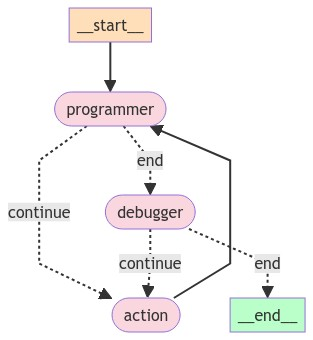

In [ ]:


display_graph(app)

In [ ]:
def entry(input):
    return input

def work_with_b(messages):
    print("Using branch b")
    return messages

def work_with_c(messages):
    print("Using branch c")
    return messages

def router(messages):
    if not messages:
        return END

    if "use_b" in messages[-1].content:
        return "node_b"
    else:
        return "node_c"

In [ ]:
graph = MessageGraph()

node_a = graph.add_node("node_a", entry)
node_b = graph.add_node("node_b", work_with_b)
node_c = graph.add_node("node_c", work_with_c)

graph.add_conditional_edges(
    "node_a",
    router,
    {"node_b": "node_b", "node_c": "node_c"}
)

graph.add_edge("node_b", END)
graph.add_edge("node_c", END)

graph.set_entry_point("node_a")

app = graph.compile()

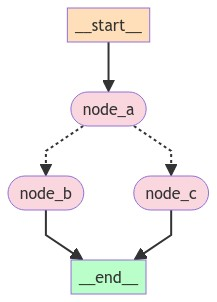

In [ ]:
display_graph(app)

In [ ]:
app.invoke("hello use_b")

Using branch b


[HumanMessage(content='hello use_b', id='2c987c32-bd14-4c0d-ab32-a18ecac03e17')]

 ## Cycles using Langgraph

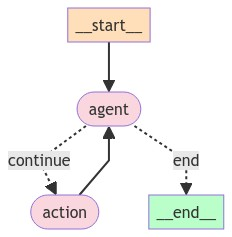

In [ ]:
def agent(messages):
    return messages


def action(messages):
    print(f"Action Taken: {[msg.content for msg in messages]}")
    if len(messages) < 5:
        messages.append(HumanMessage(content="continue"))
    else:
        messages.append(HumanMessage(content="end"))

    return messages


def should_continue(messages):
    """
    should return either 'continue' or 'end'
    """
    if "end" in messages[-1].content:
        return "end"
    return "continue"
    ...

graph = MessageGraph()

graph.add_node("agent", agent)
graph.add_node("action", action)
graph.add_conditional_edges(
    "agent",
    should_continue,
    {"continue": "action", "end": END}
)

graph.add_edge("action", "agent")
graph.set_entry_point("agent")

runnable = graph.compile()

display_graph(runnable)

In [ ]:
runnable.invoke("hi")

Action Taken: ['hi']
Action Taken: ['hi', 'continue']
Action Taken: ['hi', 'continue', 'continue']
Action Taken: ['hi', 'continue', 'continue', 'continue']
Action Taken: ['hi', 'continue', 'continue', 'continue', 'continue']


[HumanMessage(content='hi', id='2f27606c-255e-4e66-b852-7448122367de'),
 HumanMessage(content='continue', id='78e5109e-e29c-4640-8081-920ef82b55e7'),
 HumanMessage(content='continue', id='09471ed5-3c3b-4c7c-a4c5-fb7092e7fdaf'),
 HumanMessage(content='continue', id='58631189-3d0f-455b-8be2-b5037e62f57a'),
 HumanMessage(content='continue', id='0fb9ecc1-fd8b-41c5-be77-781792f525e0'),
 HumanMessage(content='end', id='90e3ac95-3bcf-4f79-bbf9-1b88a469a7e4')]

## Actual Agents using LangGraph

In [ ]:
import os
import random

from langchain_groq import ChatGroq
from langchain_openai import ChatOpenAI

# Import things that are needed generically
from langchain_core.pydantic_v1 import BaseModel, Field
from langchain_core.tools import StructuredTool, tool

import operator
from typing import Annotated, TypedDict, Union, Sequence

from langchain_core.agents import AgentAction, AgentFinish
from langchain_core.messages import BaseMessage, ToolMessage, SystemMessage, HumanMessage
from langchain.prompts import PromptTemplate, ChatPromptTemplate


from langgraph.prebuilt import ToolInvocation
from langgraph.prebuilt.tool_executor import ToolExecutor
from langgraph.graph import END, StateGraph

In [ ]:
# Langsmith tracing
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGCHAIN_API_KEY"] = userdata.get('LANGCHAIN_API_KEY')
os.environ["LANGCHAIN_PROJECT"] = "pr-trustworthy-green-6"


In [ ]:
# Groq model
os.environ["GROQ_API_KEY"] = userdata.get('GROQ_API_KEY')
os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

model = ChatGroq(model="llama3-8b-8192")
# model = ChatOpenAI(model="gpt-3.5-turbo-0125")

In [ ]:
# prompt: write a function that gives the actual answer only 1 out of 3 times. Rest of the times it gives the output "Service Unavailable"

class WeatherApiInput(BaseModel):
    location: str = Field(description="Location name")


class PopulationApiInput(BaseModel):
    location: str = Field(description="Location name")

@tool("weather-api", args_schema=WeatherApiInput, return_direct=True)
def fake_weather_api(location):
  """
  the function takes as input the location and gives details about the current weather there.
  """
  if random.random() < 1/3:
    # Calculate and return the actual answer here.
    # Replace the following line with your actual answer calculation.
    answer = "Sunny"
    return answer
  else:
    return "Service Unavailable"


@tool("population-api", args_schema=PopulationApiInput, return_direct=True)
def fake_population_api(location):
    """
    the function takes as input the location and gives details about the population there.
    """
    if random.random() < 1/3:
        # Calculate and return the actual answer here.
        # Replace the following line with your actual answer calculation.
        answer = 100000
        return answer
    else:
        return "Service Unavailable"

# Example usage:
input = "Chennai"
answer = fake_weather_api.invoke(input)
print(answer)
answer = fake_population_api.invoke(input)
print(answer)


Sunny
100000


In [ ]:
# Let's inspect some of the attributes associated with the tool.
print(fake_weather_api.name)
print(fake_weather_api.description)
print(fake_weather_api.args)
print(fake_weather_api.return_direct)

weather-api
the function takes as input the location and gives details about the current weather there.
{'location': {'title': 'Location', 'description': 'Location name', 'type': 'string'}}
True


In [ ]:
tools = [fake_weather_api, fake_population_api]
tool_executor = ToolExecutor(tools=tools)

In [ ]:
llm_with_tools = model.bind_tools(tools=[fake_weather_api, fake_population_api])

In [ ]:
query = "Whats the population of Coimbatore? and how is the weather there?"
messages = [HumanMessage(content=query)]

response = llm_with_tools.invoke(messages)

response.content = " "
messages.append(response)

print(response.tool_calls)

[{'name': 'population-api', 'args': {'location': 'Chennai'}, 'id': 'call_jfqk'}, {'name': 'weather-api', 'args': {'location': 'Chennai'}, 'id': 'call_ew5z'}]


In [ ]:
# response.additional_kwargs["tool_calls"][0]["function"]["name"]
for tool_call in response.tool_calls:
    tool_action = ToolInvocation(
        tool=tool_call["name"],
        tool_input=tool_call["args"]
    )
    tool_response = tool_executor.invoke(tool_action)
    messages.append(ToolMessage(content=tool_response, tool_call_id=tool_call["id"]))

    # print(f"{tool_response=}")

messages

[HumanMessage(content='Whats the population of Chennai? and how is the weather there?'),
 AIMessage(content=' ', additional_kwargs={'tool_calls': [{'id': 'call_jfqk', 'function': {'arguments': '{"location":"Chennai"}', 'name': 'population-api'}, 'type': 'function'}, {'id': 'call_ew5z', 'function': {'arguments': '{"location":"Chennai"}', 'name': 'weather-api'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 115, 'prompt_tokens': 1040, 'total_tokens': 1155, 'completion_time': 0.090135671, 'prompt_time': 0.231213148, 'queue_time': None, 'total_time': 0.321348819}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_af05557ca2', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-cf0c6453-e486-4015-b7f3-78d9a8ef1dbf-0', tool_calls=[{'name': 'population-api', 'args': {'location': 'Chennai'}, 'id': 'call_jfqk'}, {'name': 'weather-api', 'args': {'location': 'Chennai'}, 'id': 'call_ew5z'}]),
 ToolMessage(content='100000', tool_call_id='call_jfqk'),
 

In [ ]:
final_response = llm_with_tools.invoke(messages)
print(final_response.content)

The population of Chennai is 100000 and the weather is Sunny.


In [ ]:
final_response

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_4gp0', 'function': {'arguments': '{"location":"Chennai"}', 'name': 'population-api'}, 'type': 'function'}, {'id': 'call_17t8', 'function': {'arguments': '{"location":"Chennai"}', 'name': 'weather-api'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 129, 'prompt_tokens': 1098, 'total_tokens': 1227, 'completion_time': 0.10160065, 'prompt_time': 0.164424614, 'queue_time': None, 'total_time': 0.266025264}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_af05557ca2', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-bdf8ef41-4f61-4fcc-a097-2731a91e4169-0', tool_calls=[{'name': 'population-api', 'args': {'location': 'Chennai'}, 'id': 'call_4gp0'}, {'name': 'weather-api', 'args': {'location': 'Chennai'}, 'id': 'call_17t8'}])

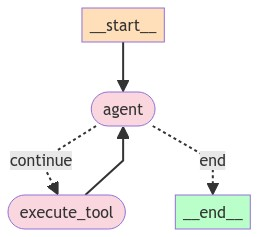

In [ ]:
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]

def call_agent(state: AgentState):
    chat_history = state["messages"]
    agent_response = llm_with_tools.invoke(chat_history)
    return { "messages": [agent_response] }


def execute_tool(state: AgentState):
    last_message = state["messages"][-1]

    all_tool_responses = []
    for tool_call in last_message.tool_calls:
        tool_action = ToolInvocation(
            tool=tool_call["name"],
            tool_input=tool_call["args"]
        )
        tool_response = tool_executor.invoke(tool_action)
        all_tool_responses.append(ToolMessage(content=tool_response, tool_call_id=tool_call["id"]))

    return { "messages": all_tool_responses }


def should_continue(state: AgentState):
    print(f"{state=}")
    last_message = state["messages"][-1]

    if not last_message.tool_calls:
        return "end"

    return "continue"


graph = StateGraph(AgentState)

graph.add_node("agent", call_agent)
graph.add_node("execute_tool", execute_tool)
graph.add_conditional_edges(
    "agent",
    should_continue,
    {"continue": "execute_tool", "end": END}
)
graph.add_edge("execute_tool", "agent")
graph.set_entry_point("agent")

agent = graph.compile()

display_graph(agent)

In [ ]:
system_message = SystemMessage(content="You are a useful assistant. You have access to some tools to answer user query. You try to get the answer from the tools. If the tools don't give an answer, try again and get the answer.")
human_message = HumanMessage(content="What is the weather like in Mumbai")

messages = [system_message, human_message]

agent.invoke({ "messages": messages })

state={'messages': [SystemMessage(content="You are a useful assistant. You have access to some tools to answer user query. You try to get the answer from the tools. If the tools don't give an answer, try again and get the answer."), HumanMessage(content='What is the weather like in Mumbai'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_8rvy', 'function': {'arguments': '{"location":"Mumbai"}', 'name': 'weather-api'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 67, 'prompt_tokens': 1080, 'total_tokens': 1147, 'completion_time': 0.052651892, 'prompt_time': 0.192281716, 'queue_time': None, 'total_time': 0.244933608}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_a97cfe35ae', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-6658d219-7d2a-4f4e-8788-6c1e9976885c-0', tool_calls=[{'name': 'weather-api', 'args': {'location': 'Mumbai'}, 'id': 'call_8rvy'}])]}
state={'messages': [SystemMessage(content="You are a useful

{'messages': [SystemMessage(content="You are a useful assistant. You have access to some tools to answer user query. You try to get the answer from the tools. If the tools don't give an answer, try again and get the answer."),
  HumanMessage(content='What is the weather like in Mumbai'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_8rvy', 'function': {'arguments': '{"location":"Mumbai"}', 'name': 'weather-api'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 67, 'prompt_tokens': 1080, 'total_tokens': 1147, 'completion_time': 0.052651892, 'prompt_time': 0.192281716, 'queue_time': None, 'total_time': 0.244933608}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_a97cfe35ae', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-6658d219-7d2a-4f4e-8788-6c1e9976885c-0', tool_calls=[{'name': 'weather-api', 'args': {'location': 'Mumbai'}, 'id': 'call_8rvy'}]),
  ToolMessage(content='Service Unavailable', tool_call_id='cal